# Game Data Exploration and Analysis
This notebook analyses game data sourced from the [RAWG Video Game Database](https://rawg.io/apidocs) to understand trends and factors influencing game releases and ratings. The RAWG Video Game Database boasts to be the largest open vidoe game database with over 350,000+ games. Analyses in the notebook are limited to games released in the past 5 years (1/1/2015-31/12/2019).

### Index
* [Trends in games](#gametrends)
    * [Number of games by year](#gameyear)
    * [Number of games by month](#gamemonth)
    * [Geographical distribution of game developers](#gamedeveloper)
    
* [Factors affecting game ratings](#gamerating)
    * [Timing of Release](#gametiming)
    * [Platforms](#gameplatform)
    * [Genres](#gamegenre)

In [1]:
# dependencies and setup
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import gmaps
import os
import datetime as dt

from api_keys import g_key

# Load and read file into dataframe
game_to_load = "csvfiles/game_final.csv"
game_df = pd.read_csv(game_to_load,parse_dates=["release date"])
game_df.head()

,name,id,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,...,metacritic score,yet,owned,beaten,toplay,dropped,playing,users,month,year
0,The Witcher 3: Wild Hunt,3328,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,...,93,561,6161,2414,455,428,593,9168,5,2015
1,Life is Strange,3439,7,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,...,83,467,6164,1924,187,344,124,8212,1,2015
2,Red Dead Redemption 2,28,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Adventure', 'Action']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,...,96,405,4239,1268,1145,219,588,6095,10,2018
3,DOOM (2016),2454,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Shooter', 'Action']","['Partial Controller Support', 'Steam Achievem...",2016-05-13,...,85,317,4870,1530,319,373,225,6625,5,2016
4,Fallout 4,3070,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,...,84,296,4848,1239,226,732,223,6310,11,2015


## Trends in games <a id='gametrends'></a>
The following section explores trends in games released over the past 5 years.


In [2]:
game_df.describe()

,id,number of platforms,number of stores,number of genres,rating,max rating,rating count,metacritic score,yet,owned,beaten,toplay,dropped,playing,users,month,year
count,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000
mean,44135.141674,3.431649,3.133389,2.661143,3.542693,3.803645,189.079536,74.849213,56.361226,689.740679,100.758906,53.618061,54.625518,24.722452,815.222038,6.449047,2016.652030
std,81914.931149,1.695793,1.608828,1.136025,0.566836,0.826822,334.490177,9.550015,74.560050,862.922782,227.359482,110.434289,90.047706,55.174230,1074.597188,3.298904,1.356714
min,2.000000,1.000000,1.000000,1.000000,1.270000,1.000000,5.000000,27.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,2015.000000
25%,3393.500000,2.000000,2.000000,2.000000,3.185000,4.000000,20.000000,70.000000,10.000000,133.000000,6.000000,3.000000,7.000000,1.000000,154.500000,4.000000,2015.000000
50%,13325.000000,3.000000,3.000000,3.000000,3.570000,4.000000,58.000000,76.000000,28.000000,378.000000,21.000000,12.000000,20.000000,5.000000,432.000000,7.000000,2016.000000
75%,45844.500000,4.000000,4.000000,3.000000,3.980000,4.000000,199.000000,81.000000,69.500000,880.500000,80.500000,49.000000,61.000000,22.000000,971.500000,9.000000,2018.000000
max,401808.000000,8.000000,8.000000,7.000000,4.760000,5.000000,3491.000000,97.000000,561.000000,6164.000000,2414.000000,1145.000000,732.000000,593.000000,9168.000000,12.000000,2019.000000


Observations include:
* The range and standard deviation of the Metacritic score data indicate the dataset has high variability.  The mean and median being close together however indicates the dataset has to be a relatively symmetrical distribution
* The rating has measures of variability of relative magnitude although slightly higher proportionally, which would indicate a slightly more variable dataset.  As with the Metacritic score the mean and median are close
* The month series relates to the time the game was released. With a mean of 6.4 and a median of 7, the data is skewed to the right and shows slightly more games have been released in the later half of the year.
* Similarly for year of release distribution, mean and median centered around 2016 indicates more games released in the early years 2015-2016, than in the remaining years 2017-2019.


In [3]:
corr = game_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,number of platforms,number of stores,number of genres,rating,max rating,rating count,metacritic score,yet,owned,beaten,toplay,dropped,playing,users,month,year
id,1.000000,-0.100906,-0.067769,-0.142510,0.127198,0.107025,-0.089809,0.059448,-0.129297,-0.179399,-0.067563,0.111951,-0.117566,0.002661,-0.158219,0.111981,0.573865
number of platforms,-0.100906,1.000000,0.815591,0.319175,0.021425,0.011414,0.064608,0.032644,0.184175,0.171194,0.028059,-0.016909,0.146597,0.028311,0.144862,-0.001920,-0.064407
number of stores,-0.067769,0.815591,1.000000,0.305129,0.068582,0.047757,0.133336,0.024571,0.269733,0.202719,0.104843,0.093515,0.181194,0.074214,0.188780,0.036200,0.041796
number of genres,-0.142510,0.319175,0.305129,1.000000,-0.147270,-0.125628,-0.087177,-0.060201,-0.023576,-0.009490,-0.105927,-0.085533,-0.022568,-0.061350,-0.033182,-0.035697,-0.112612
rating,0.127198,0.021425,0.068582,-0.147270,1.000000,0.793211,0.366422,0.609815,0.289987,0.204690,0.380588,0.393058,0.213783,0.381346,0.264473,0.046467,0.188139
max rating,0.107025,0.011414,0.047757,-0.125628,0.793211,1.000000,0.273601,0.494631,0.243030,0.163785,0.283982,0.291924,0.155787,0.289261,0.206458,0.030529,0.122358
rating count,-0.089809,0.064608,0.133336,-0.087177,0.366422,0.273601,1.000000,0.364214,0.789600,0.850759,0.934762,0.686098,0.771489,0.814874,0.922789,-0.007869,-0.026442
metacritic score,0.059448,0.032644,0.024571,-0.060201,0.609815,0.494631,0.364214,1.000000,0.345040,0.293192,0.339788,0.337038,0.275864,0.383232,0.327007,0.035945,0.083495
yet,-0.129297,0.184175,0.269733,-0.023576,0.289987,0.243030,0.789600,0.345040,1.000000,0.857655,0.726611,0.599455,0.639150,0.585681,0.872519,-0.028115,-0.067390
owned,-0.179399,0.171194,0.202719,-0.009490,0.204690,0.163785,0.850759,0.293192,0.857655,1.000000,0.714945,0.450436,0.827061,0.610041,0.985607,-0.008282,-0.190054


Running the correlation function to identify relationships between the variables shows a high correlation between number of stores and number of platforms (to be expected).  Also to be expected is the strong correlation between metacritic score and rating

### Number of games by year <a id='gameyear'></a>
We firstly want to understand the trends in game releases over the past 5 years, and whether number of games released have changed over time.

    Annual Number  F Statistic        P Value
0  Games released   283.558383  1.025329e-171
1           Users    14.447314   1.582868e-11


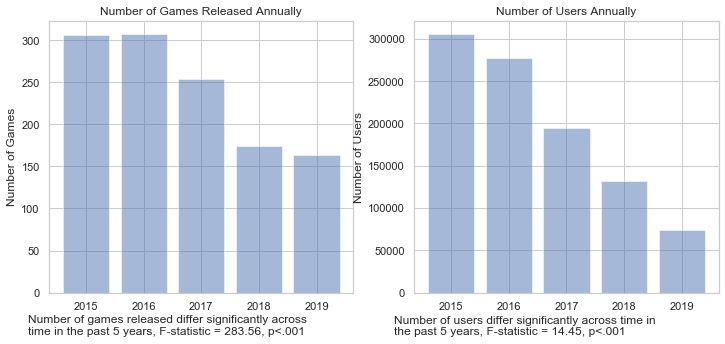

In [38]:
# Create plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))

# Generate a bar plot for total released each year
total = game_df.groupby(game_df["year"])["id"].count()

axes[0].set_title("Number of Games Released Annually")
axes[0].set_ylabel("Number of Games")

total = axes[0].bar(total.index, total, alpha=0.5)

# Generate a bar plot for total users each year
users = game_df.groupby(game_df["year"])["users"].sum()

axes[1].set_title("Number of Users Annually")
axes[1].set_ylabel("Number of Users")

users = axes[1].bar(users.index, users, alpha=0.5)

# Assign game count and rating years to variables for ANOVA
group1 = game_df[game_df["year"] == 2015]["id"]
group2 = game_df[game_df["year"] == 2016]["id"]
group3 = game_df[game_df["year"] == 2017]["id"]
group4 = game_df[game_df["year"] == 2018]["id"]
group5 = game_df[game_df["year"] == 2019]["id"]

group6 = game_df[game_df["year"] == 2015]["rating"]
group7 = game_df[game_df["year"] == 2016]["rating"]
group8 = game_df[game_df["year"] == 2017]["rating"]
group9 = game_df[game_df["year"] == 2018]["rating"]
group10 = game_df[game_df["year"] == 2019]["rating"]

# Perform the ANOVA
anova_gc = st.f_oneway(group1, group2, group3, group4, group5)
anova_r = st.f_oneway(group6, group7, group8, group9, group10)

fstats = (anova_gc[0], anova_r[0])
pstats = (anova_gc[1], anova_r[1])
counts = ("Games released", "Users")

# Create and show dataframe
frame = {"Annual Number" : counts,"F Statistic": fstats, "P Value" : pstats} 
summary_df = pd.DataFrame(frame)

print(summary_df)

axes[0].text(2014,-50,f'Number of games released differ significantly across\ntime in the past 5 years, F-statistic = {round(summary_df.iloc[0,1],2)}, p<.001')
axes[1].text(2014,-50000,f'Number of users differ significantly across time in\nthe past 5 years, F-statistic = {round(summary_df.iloc[1,1],2)}, p<.001')

plt.savefig("figures/gameuser_comparisontrend.png")


The ANOVA comparing number of games released across the past 5 years, and the ANOVA comparing the number of users recorded from the RAWG video game databaseacross the past 5 years, were both significant with p<.001. This suggests that the number of games released and number of users both significantly differed across years. Visually it is observed the number of games and annual users are in decline, with users numbers decreasing more rapidly than the number of games released.  This may be due to a real effect of saturation in games, or may be specific to the database being less used/updated over time. 

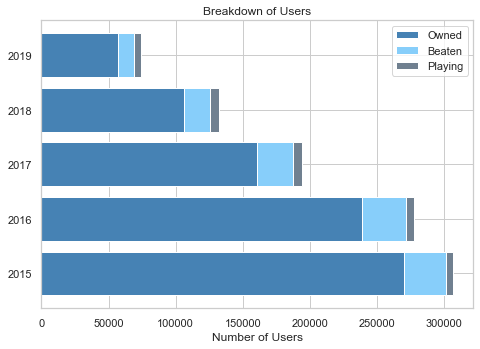

In [41]:
# Generate a stacked bar plot for breakdown of users each year
years = game_df["year"].unique()  # the y locations for the groups
years.sort()

owned = game_df.groupby(game_df["year"]).owned.sum()
beaten = game_df.groupby(game_df["year"]).beaten.sum()
playing = game_df.groupby(game_df["year"]).playing.sum()
b = list(owned + beaten)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(years, owned, color="steelblue")
ax.barh(years, beaten, left=owned, color="lightskyblue")
ax.barh(years, playing, left=b, color="slategrey")


ax.set_xlabel("Number of Users")
ax.set_title("Breakdown of Users")
ax.set_yticks(years, (years[0], years[1], years[2], years[3], years[4]))

ax.legend(labels=["Owned", "Beaten", "Playing"])

plt.savefig("figures/gameuser_annualtrend.png")

The API database separates each game's user groups as those who 
1. have '*yet*' to own the game
2. '*own*' the game
3. are currently '*playing*'
4. have '*beaten*' the game
5. have '*dropped*' the game
6. have yet '*to play*' the game

For our purpose, 'active' users are defined as those who own, are currently playing or have beaten the game.  The API database does not define the user groups, which is a limiting factor in further interpretation and analysis.  From above, it is clear to see that the year on year drop in user numbers is being driven primarily by less people owning the game


### Number of games by month <a id='gamemonth'></a>
We next look at monthly variations in games released over the past 5 years.

In [6]:
# Monthly spread of games by year

# Declare variables for loop
years = game_df["year"].unique()
years.sort()

months = game_df["month"].unique()
months.sort()

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug", "Sep","Oct","Nov","Dec"]

# Create empty dataframe 
month_df = pd.DataFrame(0, index=np.arange(len(months)+1), columns=years)

# Populate dataframe
for year in years:  
    current_yr = game_df.loc[game_df["year"] == year]
    month_df[year] = pd.DataFrame(current_yr.groupby(["month"])["id"].count())
    
# Clean up dataframe    
month_df = month_df.dropna()
month_df["month"] = months
month_df = month_df[["month", 2015, 2016, 2017, 2018, 2019]]


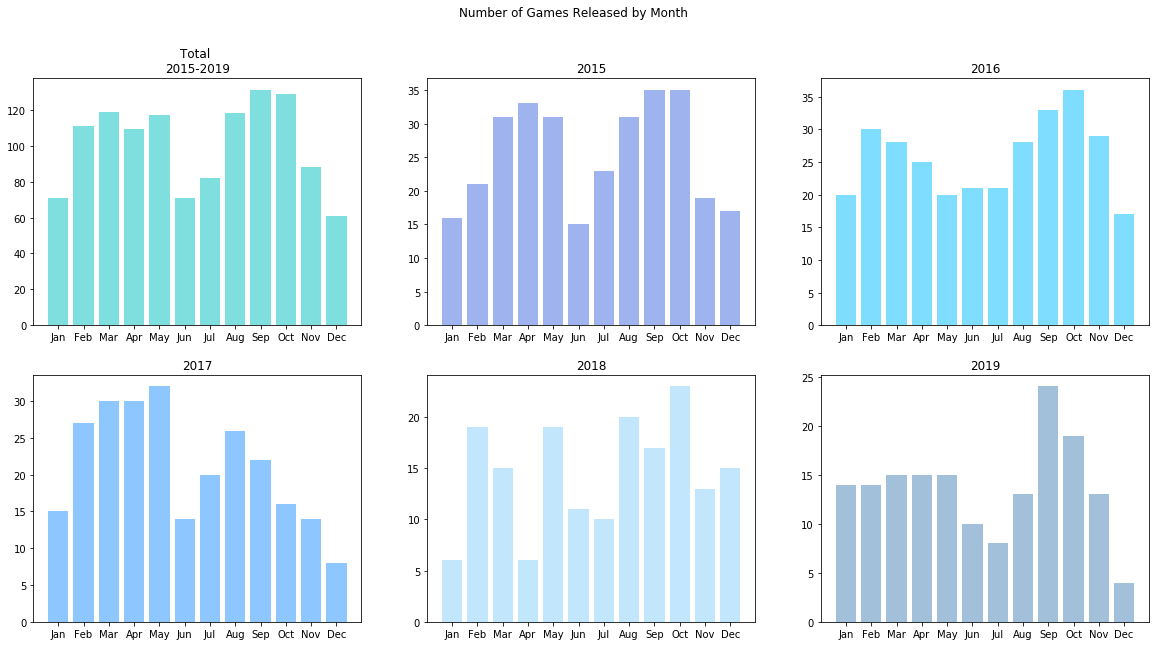

In [7]:
# Create plot
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))
fig.suptitle("Number of Games Released by Month")

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug", "Sep","Oct","Nov","Dec"]

#plt.title("Number of Games Released by Month")
all_years = game_df.groupby(["month"])["id"].count()
barplot0 = axes[0,0].bar(months, all_years, color="c", alpha=0.5)
axes[0,0].set_title('Total \n2015-2019')

year1 = month_df[2015]
barplot1 = axes[0,1].bar(months, year1, color="royalblue", alpha=0.5)
axes[0,1].set_title('2015')

year2 = month_df[2016]
barplot2 = axes[0,2].bar(months, year2, color="deepskyblue", alpha=0.5)
axes[0,2].set_title('2016')

year3 = month_df[2017]
barplot3 = axes[1,0].bar(months, year3, color="dodgerblue", alpha=0.5)
axes[1,0].set_title('2017')

year4 = month_df[2018]
barplot4 = axes[1,1].bar(months, year4, color="lightskyblue", alpha=0.5)
axes[1,1].set_title('2018')

year5 = month_df[2019]
barplot5 = axes[1,2].bar(months, year5, color="steelblue", alpha=0.5)
axes[1,2].set_title('2019')

plt.savefig("figures/game_monthlytrend.png")

The distribution of games across the months shows a drop off in game releases in the middle of the year (June/July), with a definite increase heading into the end of year (September/October).  As expected, realeases taper off in December, being a major holiday period in many parts of the world.

### Geographical distribution of game developers <a id='gamedeveloper'></a> (Post Hoc exploration)
The dip and spike in game releases across the months suggest a seasonal cycle to game releases. We think this is due to the seasonal cycle in the northern hemisphere, with not many people huddled at home playing games in summer and more people being indoors around winter/holiday times such as Thanksgiving. The gaming industry might be catering to an increase in gaming interest around that time. As such, we wish to visualise the location of game developers, to explore whether game developers mainly reside in the northern hemisphere (ie. Summer in Jun/July, Winter in Nov/Dec).

In [8]:
# load the required developer csv
developer_df=pd.read_csv("csvfiles/developers.csv")

Most listed games have multiple developers and so, in order to perform the analysis, it was assumed that order in the listing was an indication of size of contribution and the first developer listed was 'assumed' to be the primary developer. The following sections look only at the first developer of each game.

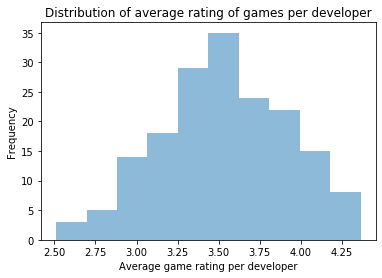

In [9]:
# exploring game ratings by developer
dev_gamecount=pd.DataFrame(developer_df.groupby("first dev")["rating"].agg(["count","mean","median","var","std","sem"]))
dev_gamecount=dev_gamecount.sort_values("count",ascending=False)
# only looking at developers who have released more than 1 game in the past 5 years - 'prolific' developers
dev_gamecount=dev_gamecount[dev_gamecount["count"]>1]
dev_gamecount["average rating count"]=developer_df.groupby("first dev")["rating count"].mean()

plt.hist(dev_gamecount["mean"],align="left",alpha=0.5)
plt.title("Distribution of average rating of games per developer")
plt.xlabel("Average game rating per developer")
plt.ylabel("Frequency")
plt.savefig("figures/developer_rating.png")

Distribution of average game rating by developer is fairly normal.

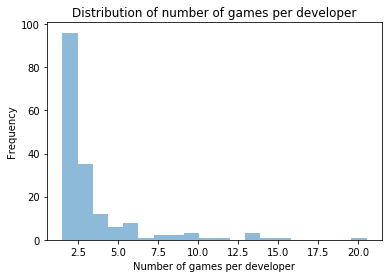

In [10]:
# exploring the number of games released by each developer between 2015-2019
plt.hist(dev_gamecount["count"],align="left",bins=20,alpha=0.5)
plt.title("Distribution of number of games per developer")
plt.xlabel("Number of games per developer")
plt.ylabel("Frequency")
plt.savefig("figures/developer_gamecount.png")

Most developers only release a few games in the past 5 years.

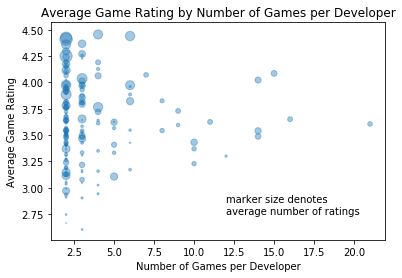

In [11]:
plt.scatter(dev_gamecount["count"],dev_gamecount["mean"],s=dev_gamecount["average rating count"]/10,alpha=0.4)
plt.title("Average Game Rating by Number of Games per Developer")
plt.xlabel("Number of Games per Developer")
plt.ylabel("Average Game Rating")
plt.annotate("marker size denotes\naverage number of ratings",(12,2.75))
plt.savefig("figures/game_developer.png")

The scatterplot shows no strong association between the number of games released by each developer and their average game rating. Most developers release only 2-4 games in the past 5 years (also ref previous fig - not a normal distribution), with games being rated across the range of scores. As such, in the following sections which look at the location of game developers and the top 10 game developers, only game ratings (and not number of game releases) were used to determine the top game developers.

In [12]:
# obtaining the location of each developer's office using google maps
lat=[]
lng=[]

params={
    "inputtype":"textquery",
    "key":g_key,
}

for i in dev_gamecount.index:
    params["input"]=i
    url="https://maps.googleapis.com/maps/api/place/autocomplete/json?parameters"
    response=requests.get(url, params=params).json()
    try:
        place_id=response["predictions"][0]["place_id"]
        url2="https://maps.googleapis.com/maps/api/geocode/json?place_id="+place_id+"&key="+g_key
        response2=requests.get(url2).json()
        lat.append(response2["results"][0]["geometry"]["location"]["lat"])
        lng.append(response2["results"][0]["geometry"]["location"]["lng"])
    except:
        lat.append("missing")
        lng.append("missing")

dev_gamecount["lat"]=lat
dev_gamecount["lng"]=lng
dev_gamecount=dev_gamecount[dev_gamecount["lat"]!="missing"]

lat_dict=dev_gamecount["lat"].to_dict()
lng_dict=dev_gamecount["lng"].to_dict()
developer_df["lat"]= developer_df["first dev"].map(lat_dict)
developer_df["lng"]= developer_df["first dev"].map(lng_dict)
developer_df.head()

,game,developer,number of devs,rating,rating count,metacritic,first dev,lat,lng
0,The Witcher 3: Wild Hunt,['CD PROJEKT RED'],1,4.67,3491,93,CD PROJEKT RED,50.060243,19.920131
1,Life is Strange,['DONTNOD Entertainment'],1,4.10,2230,83,DONTNOD Entertainment,48.892459,2.369706
2,Red Dead Redemption 2,['Rockstar Games'],1,4.56,2559,96,Rockstar Games,NaN,NaN
3,DOOM (2016),"['Bethesda Softworks', 'id Software']",2,4.39,2188,85,Bethesda Softworks,39.105248,-77.180634
4,Fallout 4,['Bethesda Game Studios'],1,3.75,1991,84,Bethesda Game Studios,39.105248,-77.180634


In [13]:
# removing rows without a developer location
developer_df_2=developer_df.dropna(how="any").copy()
developer_df_2.count()

game              452
developer         452
number of devs    452
rating            452
rating count      452
metacritic        452
first dev         452
lat               452
lng               452
dtype: int64

In [14]:
# getting the top 10 developers by rating
dev_gamecount=dev_gamecount.sort_values("mean",ascending=False)
top_devs_df=dev_gamecount[0:10]
top_devs_df=top_devs_df.reset_index()
top_devs_df["mean"]=round(top_devs_df["mean"],2)
top_devs_df

,first dev,count,mean,median,var,std,sem,average rating count,lat,lng
0,FromSoftware,4,4.46,4.385,0.020567,0.143411,0.071705,828.250000,35.6733,139.662
1,CD PROJEKT RED,6,4.44,4.700,0.210280,0.458563,0.187208,881.166667,50.0602,19.9201
2,Naughty Dog,2,4.41,4.410,0.028800,0.169706,0.120000,1541.500000,34.0281,-118.471
3,Larian Studios,3,4.37,4.380,0.005033,0.070946,0.040961,577.333333,51.0608,3.71371
4,Moon Studios GmbH,2,4.36,4.360,0.001800,0.042426,0.030000,842.500000,48.2055,16.3534
5,Platinum Games,3,4.27,4.320,0.012900,0.113578,0.065574,462.000000,34.7054,135.491
6,Monolith Soft,3,4.26,4.290,0.003333,0.057735,0.033333,77.000000,50.3283,30.2891
7,Insomniac Games,2,4.25,4.250,0.088200,0.296985,0.210000,1471.500000,34.1935,-118.345
8,Firaxis,2,4.24,4.240,0.016200,0.127279,0.090000,420.000000,39.5213,-76.6463
9,Nihon Falcom,3,4.23,4.410,0.100833,0.317543,0.183333,16.666667,35.7008,139.414


In [15]:
# configure gmaps
gmaps.configure(api_key=g_key)

# Use the Lat and Lng as locations
locations=developer_df_2[["lat","lng"]]

# create heatmap
fig = gmaps.figure(center=(20,0),zoom_level=2)
heatmap_layer = gmaps.heatmap_layer(
    locations,
    weights=developer_df_2["rating"],
    dissipating=False,
    max_intensity=50,
    point_radius=3
)
fig.add_layer(heatmap_layer)

In [16]:
# Add marker layer of top devs over heat map
info_box_template = """
<dl>
<dt>Developer</dt><dd>{first dev}</dd>
<dt>Number of Games</dt><dd>{count}</dd>
<dt>Average Rating</dt><dd>{mean}</dd>
</dl>
"""
dev_info = [info_box_template.format(**row) for index, row in top_devs_df.iterrows()]
locations = top_devs_df[["lat", "lng"]]

markers=gmaps.marker_layer(locations,info_box_content=dev_info)
fig.add_layer(markers)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

## Factors affecting game ratings <a id='gamerating'></a>
The next section looks into the factors that may influence game ratings.
Three candidate factors that are considered in this notebook are timing of release, game platforms, and game genre. 
Before diving into the factors, the first step is to examine the two game rating measures - 

1. users' rating
2. metacritic score (ie. the critics)


Correlation coefficient is 0.61
Linear regression model is y = 10.27x + 38.45


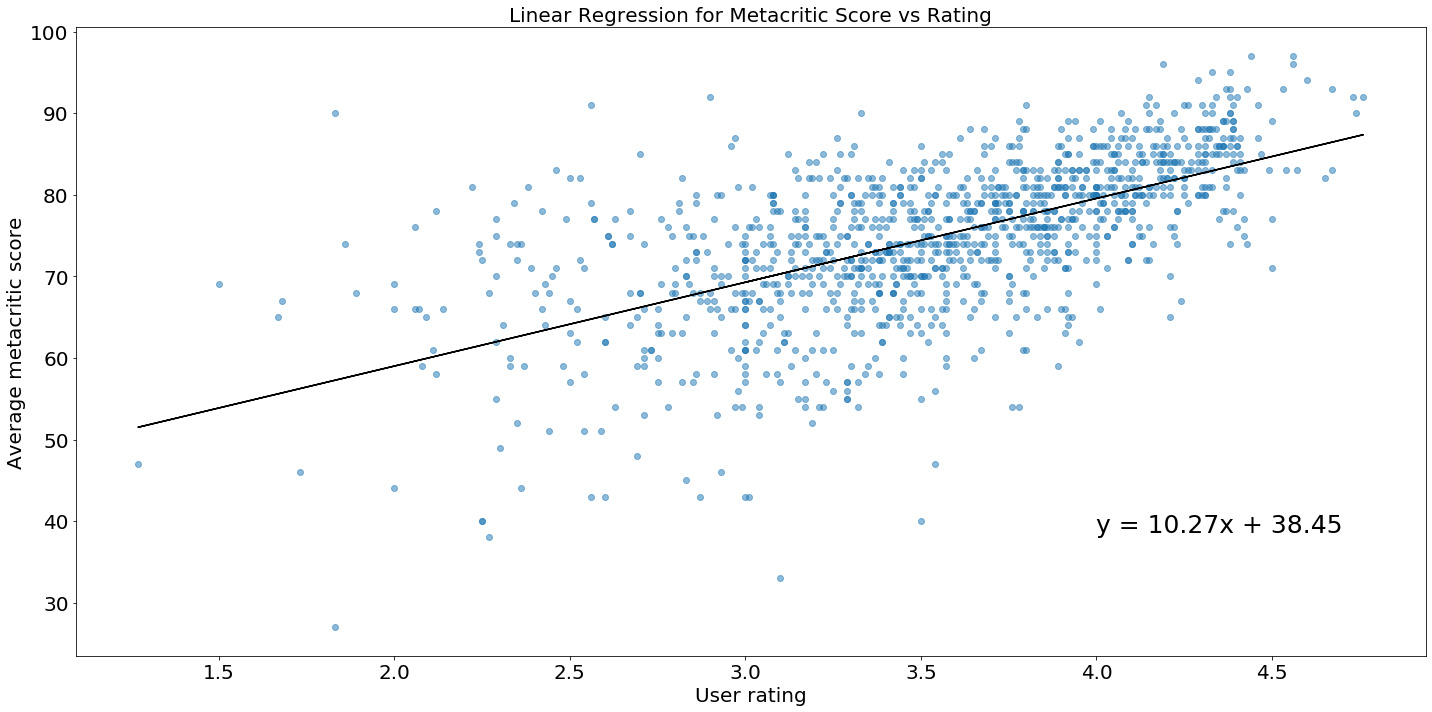

In [17]:
# user rating VS metacritic score
mean_rating = game_df.groupby(["name"])["rating"].mean()
mean_metascore = game_df.groupby(["name"])["metacritic score"].mean()

slope, intercept, rvalue, pvalue, stderror = st.linregress(mean_rating, mean_metascore)
linear = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Correlation coefficient is {round(rvalue,2)}")
print(f"Linear regression model is {linear}")

regression = mean_rating*slope + intercept
plt.figure(figsize=(20,10))
plt.annotate(linear, (4,38.6), fontsize=25, color="black")
plt.scatter(mean_rating, mean_metascore, alpha=0.5)
plt.plot(mean_rating, regression, color="black")
plt.title("Linear Regression for Metacritic Score vs Rating", fontsize=20)
plt.xlabel("User rating", fontsize=20)
plt.ylabel("Average metacritic score", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()

plt.savefig("figures/gamerating.png")

The scatterplot and linear regression show that user rating is strongly associated with metacritic score (correlation coefficient = 0.61). As such, either rating measure may be similarly used as a proxy for game rating.

In [18]:
# quartiles, outliers and interquartile range for user rating
rating = game_df["rating"]

rating_output =[]
rating_quartiles = rating.quantile([0.25, 0.5, 0.75])

rating_lowerq = rating_quartiles[0.25]
rating_upperq = rating_quartiles[0.75]
rating_iqr = rating_upperq-rating_lowerq
rating_lowerbound = rating_lowerq - (1.5*rating_iqr)
rating_upperbound = rating_upperq + (1.5*rating_iqr)

rating_outlier_count =  game_df.loc[(game_df["rating"] > rating_upperbound)|
                                   (game_df["rating"] < rating_lowerbound)
                               ]["rating"].count()
rating_outlier_vol = game_df.loc[(game_df["rating"] > rating_upperbound)|
                                (game_df["rating"] < rating_lowerbound)
                               ]["rating"].sum()

rating_output.append({"Lower Quartile":rating_lowerq, "Median":rating_quartiles[0.5], "Upper Quartile":rating_upperq, 
               "InterQuartile":rating_iqr, "Lower Bound":rating_lowerbound, "Upper Bound":rating_upperbound, "No. of Outliers":rating_outlier_count})

rating_output_df = pd.DataFrame(rating_output)

rating_output_df['Lower Quartile'] = rating_output_df['Lower Quartile'].map("{:,.2f}".format)
rating_output_df['Median'] = rating_output_df['Median'].map("{:,.2f}".format)
rating_output_df['Upper Quartile'] = rating_output_df['Upper Quartile'].map("{:,.2f}".format)
rating_output_df['InterQuartile'] = rating_output_df['InterQuartile'].map("{:,.2f}".format)
rating_output_df['Lower Bound'] = rating_output_df['Lower Bound'].map("{:,.2f}".format)
rating_output_df['Upper Bound'] = rating_output_df['Upper Bound'].map("{:,.2f}".format)
rating_output_df

,Lower Quartile,Median,Upper Quartile,InterQuartile,Lower Bound,Upper Bound,No. of Outliers
0,3.19,3.57,3.98,0.79,1.99,5.17,9


In [19]:
# quartiles, outliers and interquartile range for meracritic score
metascore = game_df["metacritic score"]

metascore_output =[] 
metascore_quartiles = metascore.quantile([0.25, 0.5, 0.75])

metascore_lowerq = metascore_quartiles[0.25]
metascore_upperq = metascore_quartiles[0.75]
metascore_iqr = metascore_upperq-metascore_lowerq
metascore_lowerbound = metascore_lowerq - (1.5*metascore_iqr)
metascore_upperbound = metascore_upperq + (1.5*metascore_iqr)

metascore_outlier_count =  game_df.loc[(game_df["metacritic score"] > metascore_upperbound)|
                                   (game_df["metacritic score"] < metascore_lowerbound)
                               ]["metacritic score"].count()
metascore_outlier_vol = game_df.loc[(game_df["metacritic score"] > metascore_upperbound)|
                                (game_df["metacritic score"] < metascore_lowerbound)
                               ]["metacritic score"].sum()

metascore_output.append({"Lower Quartile":metascore_lowerq, "Median":metascore_quartiles[0.5], "Upper Quartile":metascore_upperq, 
               "InterQuartile":metascore_iqr, "Lower Bound":metascore_lowerbound, "Upper Bound":metascore_upperbound, "No. of Outliers":metascore_outlier_count})

metascore_output_df = pd.DataFrame(metascore_output)

metascore_output_df['Lower Quartile'] = metascore_output_df['Lower Quartile'].map("{:,.2f}".format)
metascore_output_df['Median'] = metascore_output_df['Median'].map("{:,.2f}".format)
metascore_output_df['Upper Quartile'] = metascore_output_df['Upper Quartile'].map("{:,.2f}".format)
metascore_output_df['InterQuartile'] = metascore_output_df['InterQuartile'].map("{:,.2f}".format)
metascore_output_df['Lower Bound'] = metascore_output_df['Lower Bound'].map("{:,.2f}".format)
metascore_output_df['Upper Bound'] = metascore_output_df['Upper Bound'].map("{:,.2f}".format)
metascore_output_df

,Lower Quartile,Median,Upper Quartile,InterQuartile,Lower Bound,Upper Bound,No. of Outliers
0,70.00,76.00,81.00,11.00,53.50,97.50,28


,Type,F Statistic,P Value
0,Metacritic Score,3.568428,6.679203e-03
1,User Rating,14.447314,1.582868e-11


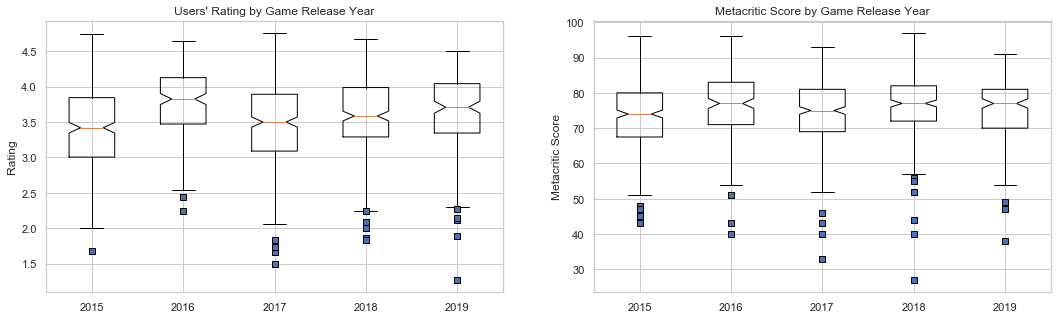

In [50]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,5))

# Generate a box plot for range of user ratings each year
blue_square = dict(markerfacecolor='b', marker='s')
years = game_df["year"].unique()
years.sort()

rating_yr=[]
for i in game_df["year"].unique():
    rating_yr.append(game_df["rating"][game_df["year"]==i])     

axes[0].boxplot(rating_yr,notch = True,labels = years,flierprops=blue_square)
axes[0].set_title("Users' Rating by Game Release Year")
axes[0].set_ylabel("Rating")

# Perform ANOVA for user rating
group1 = game_df.loc[game_df["year"] == 2015]["rating"]
group2 = game_df.loc[game_df["year"] == 2016]["rating"]
group3 = game_df.loc[game_df["year"] == 2017]["rating"]
group4 = game_df.loc[game_df["year"] == 2018]["rating"]
group5 = game_df.loc[game_df["year"] == 2019]["rating"]

anova_r = st.f_oneway(rating_yr[0], rating_yr[1], rating_yr[2], rating_yr[3], rating_yr[4])

# Generate a box plot for range of metacritic scores each year
metacritic_yr=[]
for i in game_df["year"].unique():
    metacritic_yr.append(game_df["metacritic score"][game_df["year"]==i])     

axes[1].boxplot(metacritic_yr,notch = True,labels = years,flierprops=blue_square)
axes[1].set_title("Metacritic Score by Game Release Year")
axes[1].set_ylabel("Metacritic Score")

# Perform ANOVA for metacritic score
group6 = game_df[game_df["year"] == 2015]["metacritic score"]
group7 = game_df[game_df["year"] == 2016]["metacritic score"]
group8 = game_df[game_df["year"] == 2017]["metacritic score"]
group9 = game_df[game_df["year"] == 2018]["metacritic score"]
group10 = game_df[game_df["year"] == 2019]["metacritic score"]

anova_m = st.f_oneway(metacritic_yr[0], metacritic_yr[1], metacritic_yr[2], metacritic_yr[3], metacritic_yr[4])

# Create and show dataframe
fstats = (anova_m[0], anova_r[0])
pstats = (anova_m[1], anova_r[1])
counts = ("Metacritic Score", "User Rating")


frame = {"Type" : counts,"F Statistic": fstats, "P Value" : pstats} 
summary_df = pd.DataFrame(frame)

plt.savefig("figures/gameusergamenumber_comparisontrend.png")

summary_df

The ANOVA and boxplots show that both users' rating and metacritic scores differ significantly across time.

Given the strong correlation between the user rating and metacritic score, it may be redundant to examine both user rating and metacritic score. Therefore all further analyses only looks at user rating.

## Timing of Release <a id='gametiming'></a>
The next section further explores how both year and month of game release may be associated with game rating.

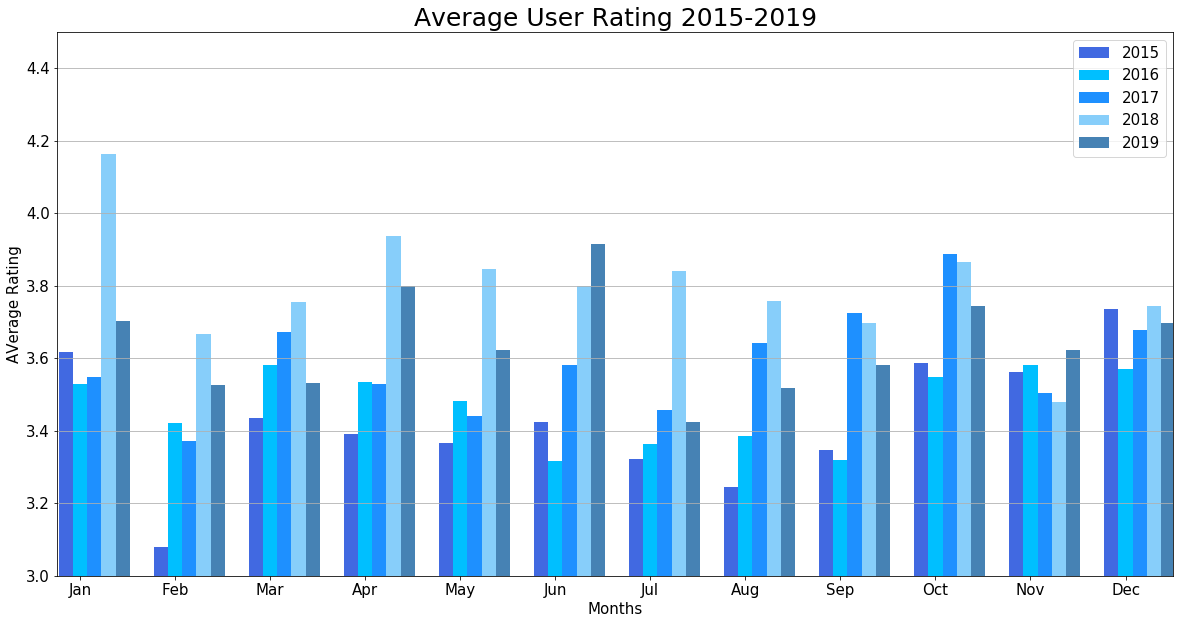

In [21]:
# Average User Rating by Year

# Declare variables for loop
years = game_df["year"].unique()
years.sort()

# Create empty dataframe
mthlyrating_df = pd.DataFrame(0, index=np.arange(len(months)+1), columns=years)

# Populate dataframe
for year in years:  
    current_yr = game_df.loc[game_df["year"] == year]
    mthlyrating_df[year] = pd.DataFrame(current_yr.groupby(["month"])["rating"].mean())

    
# Clean up dataframe
mthlyrating_df = mthlyrating_df.dropna()    
mthlyrating_df["month"] = months
mthlyrating_df = mthlyrating_df[["month", 2015, 2016, 2017, 2018, 2019]]

# Create series for each year in bar plot
index = np.arange(12)
rating1 = mthlyrating_df[2015]
rating2 = mthlyrating_df[2016]
rating3 = mthlyrating_df[2017]
rating4 = mthlyrating_df[2018]
rating5 = mthlyrating_df[2019]

# Create plot
fig, ax = plt.subplots(figsize = (20,10))
ax.grid(b=True, which='major', axis='y')

# Plot bars for each year
year1 = ax.bar(index, rating1, 0.15, label="2015", color = "royalblue")
year2 = ax.bar(index + 0.15, rating2, 0.15, label="2016", color = "deepskyblue")
year3 = ax.bar(index + 0.30, rating3, 0.15, label="2017", color= "dodgerblue" )
year4 = ax.bar(index + 0.45, rating4, 0.15, label="2018", color= "lightskyblue")
year5 = ax.bar(index + 0.60, rating5, 0.15, label="2019", color= "steelblue")

plt.title("Average User Rating 2015-2019",fontsize=25)

plt.xlabel('Months',fontsize=15)
plt.ylabel('AVerage Rating',fontsize=15)

plt.xticks(index + 0.15, months,fontsize=15)
plt.yticks(fontsize=15)

plt.xlim(-.09,11.65)
plt.ylim(3,4.5)

plt.legend(fontsize=15)

plt.savefig("figures/userrating_monthyear")

Looking at a comparison of game release timing and user ratings, for all years, games released in the last few months of the year (Oct-Dec) tend to rate higher than those released in earlier months

In [22]:
#  Generate summary statistics for mean, median, variance, standard deviation, and SEM for monthly ratings
means = game_df.groupby(["month"])["rating"].mean()
medians = game_df.groupby(["month"])["rating"].median()
stds = game_df.groupby(["month"])["rating"].std()
vars = game_df.groupby(["month"])["rating"].var()
sems = game_df.groupby(["month"])["rating"].sem()

# Create dataframe
frame = {"Month": months, "Mean": means, "Median": medians, "Std Dev": stds,"Variance": vars,"SEM": sems} 
summary = pd.DataFrame(frame) 

# Reformat output for display
summary["Mean"] = summary['Mean'].map("{:,.2f}".format)
summary["Median"] = summary["Median"].map("{:,.2f}".format)
summary["Std Dev"] = summary["Std Dev"].map("{:,.2f}".format)
summary["Variance"] = summary["Variance"].map("{:,.2f}".format)
summary["SEM"] = summary["SEM"].map("{:,.2f}".format)

print(summary)


      Month  Mean Median Std Dev Variance   SEM
month                                          
1       Jan  3.64   3.76    0.59     0.35  0.07
2       Feb  3.40   3.49    0.64     0.41  0.06
3       Mar  3.58   3.67    0.55     0.30  0.05
4       Apr  3.55   3.52    0.58     0.34  0.06
5       May  3.52   3.53    0.59     0.34  0.05
6       Jun  3.55   3.58    0.53     0.28  0.06
7       Jul  3.44   3.42    0.56     0.31  0.06
8       Aug  3.48   3.50    0.56     0.31  0.05
9       Sep  3.49   3.47    0.58     0.33  0.05
10      Oct  3.69   3.76    0.52     0.27  0.05
11      Nov  3.56   3.57    0.53     0.28  0.06
12      Dec  3.68   3.77    0.48     0.23  0.06


Taking a look at some descriptive statistics of game ratings by month, the central tendency measures (median and mean) show the dataset has a symmetrical distribution ie the data is not 'badly' skewed. Overall the mean and medians reflect the plot with games released in the later months (Oct-Dec) having a higher average rating than those released in the earlier months. The measures of variabiity, being the variance and standard deviation also show the spread of ratings is smaller in the last 3 months of the year.

## Game platforms <a id='gameplatform'></a>
This section looks at the number of games by game platforms, and whether there are any relationship between numbere of platform on which games are released, and game rating

In [23]:
# File to Load
game_path = "csvfiles/game_platform.csv"

# Read platform data and store into Pandas data frame
platform_data = pd.read_csv(game_path)

# Remove platforms with no ratings
platform_data = platform_data.dropna(how="any")

# sort platform data by number of games
platform_data=platform_data.sort_values("number of games",ascending=False)
platform_data

,name,rating count,number of games,avg rating
0,PC,202667,1113,3.865429
1,PlayStation,192624,783,3.920577
2,Xbox,165606,644,3.883666
5,Apple Macintosh,72952,495,3.832069
7,Nintendo,83119,433,3.997233
6,Linux,54689,337,3.866969
3,iOS,31724,206,3.828331
4,Android,21066,126,3.816792
13,Web,2917,5,3.844532


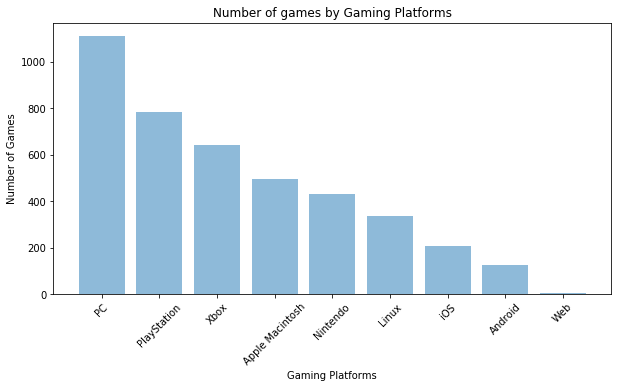

In [24]:
# Bar Graph for Number of games by Gaming Platforms
plt.figure(figsize=(10,5))
plt.bar(platform_data["name"], platform_data["number of games"], alpha=0.5)
plt.title('Number of games by Gaming Platforms')
plt.xlabel('Gaming Platforms')
plt.xticks(rotation=45)
plt.ylabel('Number of Games')
plt.savefig("figures/total_games_platform.png")

The above figure shows that PC is the platform with the highest number of games released over the past 5 years, followed by PlayStation and Xbox.

In [25]:
# create dataframe representing the platform breakdown for each game
platform_name=[i for i in platform_data["name"]]
platform_df=pd.DataFrame(game_df["name"])
platform_df["rating"]=game_df["rating"]
for i in platform_name:
    platform_df[i]=0
    for j in game_df.index:
        if i in game_df.loc[j,"platforms"]:
            platform_df.loc[j,i]=platform_df.loc[j,i]+1

platform_df.head()

,name,rating,PC,PlayStation,Xbox,Apple Macintosh,Nintendo,Linux,iOS,Android,Web
0,The Witcher 3: Wild Hunt,4.67,1,1,1,0,1,0,0,0,0
1,Life is Strange,4.10,1,1,1,1,0,1,1,1,0
2,Red Dead Redemption 2,4.56,1,1,1,0,0,0,0,0,0
3,DOOM (2016),4.39,1,1,1,0,1,0,0,0,0
4,Fallout 4,3.75,1,1,1,0,0,0,0,0,0


In [26]:
# Group rating score by number of platforms
platform_total_df = platform_df.groupby(platform_df["rating"]).sum()
platform_total_df= platform_total_df.reset_index(drop=False)
platform_total_df.head()

,rating,PC,PlayStation,Xbox,Apple Macintosh,Nintendo,Linux,iOS,Android,Web
0,1.27,1,0,0,0,0,0,0,0,0
1,1.50,1,0,0,0,0,0,0,0,0
2,1.67,1,0,0,1,1,0,0,0,0
3,1.68,1,0,0,1,0,0,1,1,0
4,1.73,1,1,1,1,0,0,0,0,0


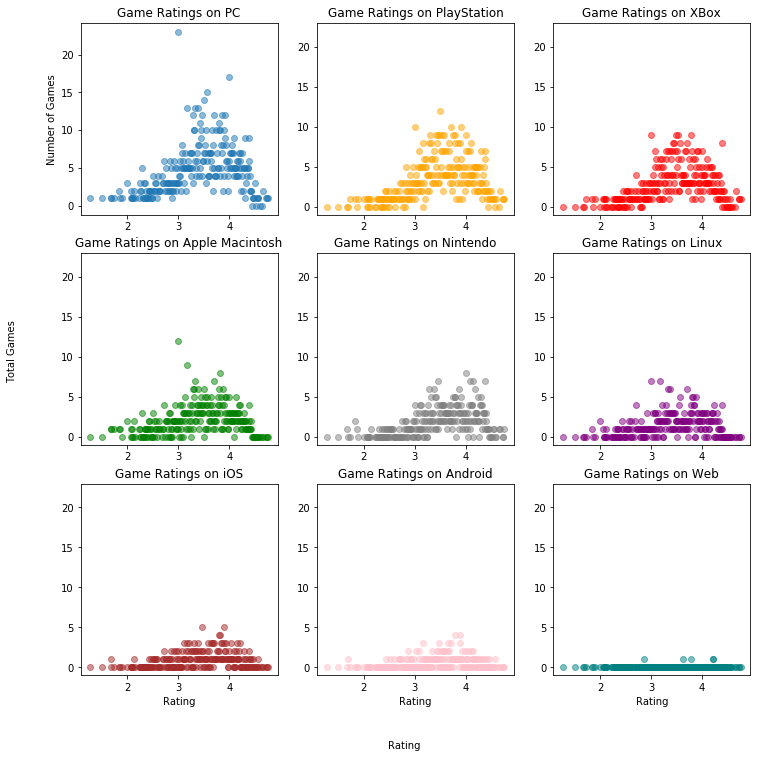

In [27]:
# Charts to analyse any trends between games and ratings on each platform
fig1, axs = plt.subplots(3, 3, figsize=(12,12))
axs[0,0].scatter(platform_total_df["rating"], platform_total_df["PC"],alpha=0.5)
axs[0,1].scatter(platform_total_df["rating"], platform_total_df["PlayStation"], color="orange",alpha=0.5)  
axs[0,2].scatter(platform_total_df["rating"], platform_total_df["Xbox"], color="red",alpha=0.5) 
axs[1,0].scatter(platform_total_df["rating"], platform_total_df["Apple Macintosh"], color="green",alpha=0.5) 
axs[1,1].scatter(platform_total_df["rating"], platform_total_df["Nintendo"], color="grey",alpha=0.5) 
axs[1,2].scatter(platform_total_df["rating"], platform_total_df["Linux"], color="purple",alpha=0.5) 
axs[2,0].scatter(platform_total_df["rating"], platform_total_df["iOS"], color="brown",alpha=0.5) 
axs[2,1].scatter(platform_total_df["rating"], platform_total_df["Android"], color="pink",alpha=0.5) 
axs[2,2].scatter(platform_total_df["rating"], platform_total_df["Web"], color="teal",alpha=0.5) 

axs[0,0].set_title("Game Ratings on PC")
axs[0,0].set_ylabel("Number of Games")

axs[0,1].set_title("Game Ratings on PlayStation")
# axs[0,1].set_xlabel("Rating")
axs[0,1].set_ylim([-1, 23])

axs[0,2].set_title("Game Ratings on XBox")
# axs[0,2].set_xlabel("Rating")
axs[0,2].set_ylim([-1, 23])

axs[1,0].set_title("Game Ratings on Apple Macintosh")
# axs[1,0].set_xlabel("Rating")
axs[1,0].set_ylim([-1, 23])

axs[1,1].set_title("Game Ratings on Nintendo")
# axs[1,1].set_xlabel("Rating")
axs[1,1].set_ylim([-1, 23])

axs[1,2].set_title("Game Ratings on Linux")
# axs[1,2].set_xlabel("Rating")
axs[1,2].set_ylim([-1, 23])

axs[2,0].set_title("Game Ratings on iOS")
axs[2,0].set_xlabel("Rating")
axs[2,0].set_ylim([-1, 23])

axs[2,1].set_title("Game Ratings on Android")
axs[2,1].set_xlabel("Rating")
axs[2,1].set_ylim([-1, 23])

axs[2,2].set_title("Game Ratings on Web")
axs[2,2].set_xlabel("Rating")
axs[2,2].set_ylim([-1, 23])

fig1.text(0.5, 0.04, 'Rating', ha='center')
fig1.text(0.04, 0.5, 'Total Games', va='center', rotation='vertical')

plt.savefig("figures/game_ratings_platform.png")

The above chart shows the number of games by average rating across the 9 different platforms. Similar to the bar chart, we can observe that there are more games released for PC than other platforms. Distribution of game rating by platform is roughly normal, with a slight left skew. 

The next cells will look at whether average number of platforms on which games are released is associated with rating score. In other words, we want to know whether games that are published on more platforms will have a higher rating.

slope 0.007161576298193272
intercept 3.5181166122393397
coefficient 0.021425145362333045
p value 0.45707947128014426
y = 0.01x +3.52


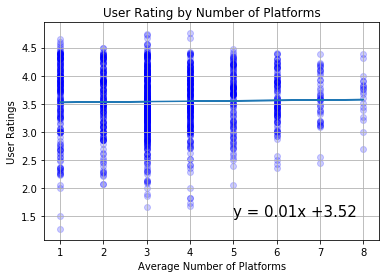

In [28]:
#Calculate the linear regresssion 
slope, intercept, rvalue, pvalue, stderr = st.linregress(game_df["number of platforms"], game_df["rating"])
print("slope", slope)
print("intercept", intercept)
print("coefficient", rvalue)
print("p value", pvalue)

rating_platforms_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(rating_platforms_eq)
rating_platforms_regression = game_df["number of platforms"] * slope + intercept

# Visualise average ratings on number of platforms.
# Plot the linear model on top of scatter plot 
plt.scatter(game_df["number of platforms"], game_df["rating"],facecolors="blue", alpha=0.2) 
plt.plot(game_df["number of platforms"], rating_platforms_regression)

plt.title("User Rating by Number of Platforms")
plt.xlabel("Average Number of Platforms")
plt.ylabel("User Ratings")
plt.grid()
plt.annotate(rating_platforms_eq,(5,1.5),fontsize=15,color="black")

plt.savefig("figures/rating_platform_scatter.png")

The correlation between average number of platforms and user ratings is not significant, suggesting that the number of platform on which a game is hosted is not associated with its rating score.

## Game genres <a id='gamegenre'></a>
The final section looks at whether user rating is associated with the game's main genre. The game's main genre is assumed to be the first listed genre of each game.

In [29]:
# get the first genre of each game (treated as the main genre for further analysis)
genre=[]
for i in game_df.index:
    curr_genre=game_df.loc[i,"genres"].split("'")
    genre.append(curr_genre[1])

game_df["first genre"]=genre
game_df.head()

,name,id,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,...,yet,owned,beaten,toplay,dropped,playing,users,month,year,first genre
0,The Witcher 3: Wild Hunt,3328,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,...,561,6161,2414,455,428,593,9168,5,2015,Adventure
1,Life is Strange,3439,7,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,...,467,6164,1924,187,344,124,8212,1,2015,Adventure
2,Red Dead Redemption 2,28,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Adventure', 'Action']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,...,405,4239,1268,1145,219,588,6095,10,2018,Adventure
3,DOOM (2016),2454,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Shooter', 'Action']","['Partial Controller Support', 'Steam Achievem...",2016-05-13,...,317,4870,1530,319,373,225,6625,5,2016,Shooter
4,Fallout 4,3070,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,...,296,4848,1239,226,732,223,6310,11,2015,Action


In [30]:
# explore summary of rating by genre

genre_summary=pd.DataFrame(game_df.groupby("first genre")["rating"].agg(["count","mean","median","var","std","sem"]))
genre_summary

,count,mean,median,var,std,sem
first genre,,,,,,
Action,112,3.595179,3.695,0.376906,0.613927,0.058011
Adventure,201,3.665920,3.710,0.302214,0.549740,0.038776
Arcade,12,3.673333,3.715,0.108315,0.329113,0.095007
Card,6,3.703333,3.695,0.223227,0.472469,0.192885
Casual,73,3.572329,3.750,0.324293,0.569467,0.066651
Educational,4,3.262500,3.320,0.393692,0.627449,0.313724
Family,9,3.768889,3.710,0.094811,0.307914,0.102638
Fighting,5,3.742000,3.630,0.244120,0.494085,0.220962
Indie,368,3.430217,3.470,0.329460,0.573986,0.029921


In [31]:
# only examining genre that have at list 100 ratings
top_genre=genre_summary.index[genre_summary["count"]>100]
for i in game_df.index:
    if game_df.loc[i,"first genre"] in top_genre:
        game_df.loc[i,"top genre"]=True
    else:
        game_df.loc[i,"top genre"]=False

# get a shortened genre_df with only the top genres
game_df_shortgenre=game_df[game_df["top genre"]==True]
game_df_shortgenre

,name,id,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,...,owned,beaten,toplay,dropped,playing,users,month,year,first genre,top genre
0,The Witcher 3: Wild Hunt,3328,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,...,6161,2414,455,428,593,9168,5,2015,Adventure,True
1,Life is Strange,3439,7,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,...,6164,1924,187,344,124,8212,1,2015,Adventure,True
2,Red Dead Redemption 2,28,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Adventure', 'Action']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,...,4239,1268,1145,219,588,6095,10,2018,Adventure,True
4,Fallout 4,3070,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,...,4848,1239,226,732,223,6310,11,2015,Action,True
5,God of War,58175,1,['PlayStation'],1,['PlayStation Store'],2,"['Adventure', 'Action']","['Action-Adventure', 'Atmospheric', 'Blood', '...",2018-04-20,...,3864,1861,753,110,279,6004,4,2018,Adventure,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,Past Cure,51814,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Indie', 'Action']","['Full controller support', 'Steam Achievement...",2018-02-23,...,19,3,8,1,0,22,2,2018,Indie,True
1197,Troll and I,11272,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Adventure', 'Action']","['Full controller support', 'Steam Achievement...",2017-03-21,...,22,0,1,4,1,23,3,2017,Adventure,True
1198,FRAMED 2,29196,2,"['iOS', 'Android']",2,"['App Store', 'Google Play']",2,"['Adventure', 'Puzzle']","['Story', 'ship']",2017-06-14,...,7,10,7,1,0,17,6,2017,Adventure,True
1201,Ever Oasis,28023,1,['Nintendo'],1,['Nintendo Store'],2,"['Action', 'RPG']","['role-playing', 'exclusive', 'true exclusive']",2017-06-23,...,2,9,9,2,1,12,6,2017,Action,True


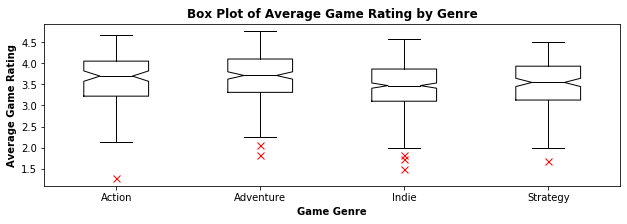

In [32]:
# visualising distribution of game rating in the top genres
game_df_shortgenre.boxplot("rating",by="first genre",figsize=(10,3),grid=False,\
                       notch=True,color="black",\
                       flierprops=dict(marker='x',markersize=7, markeredgecolor="red"))
plt.title("Box Plot of Average Game Rating by Genre",fontweight="bold")
plt.xlabel("Game Genre", fontweight="bold")
plt.ylabel("Average Game Rating", fontweight="bold")
plt.suptitle(" ")

plt.savefig("figures/gamerating_genre.png")

In [33]:
# one way anova across genre
rating=[]
curr_rating=[]
genre=[]

for i in game_df_shortgenre["first genre"].unique():
    curr_rating=game_df_shortgenre["rating"][game_df_shortgenre["first genre"]==i]
    rating.append(curr_rating)
    genre.append(i)

st.f_oneway(rating[0],rating[1],rating[2],rating[3])

F_onewayResult(statistic=8.147093080110334, pvalue=2.372589697263893e-05)

The ANOVA was significant with a p-value of <0.001, suggesting that average game ratings do differ by game genre. As such, individual t-tests will be run across each pair of genres to find out which pair are driving the results. Alpha level is set at p=0.05/(number of tests) to control for multiple comparisons

In [34]:
numtests=0
for i in range(len(genre)-1):
    numtests=numtests+(i+1)

for i in range(len(genre)):
    for j in range(len(genre)):
        if genre[i]!=genre[j]:
            result=st.ttest_ind(rating[i],rating[j],equal_var=False)
            if result.pvalue<(0.05/numtests):
                print(genre[i]+" vs "+genre[j]+" - "+str(result))

Adventure vs Indie - Ttest_indResult(statistic=4.812444119999901, pvalue=2.072538456443433e-06)
Adventure vs Strategy - Ttest_indResult(statistic=3.004395258834898, pvalue=0.002857410442298163)
Indie vs Adventure - Ttest_indResult(statistic=-4.812444119999901, pvalue=2.072538456443433e-06)
Strategy vs Adventure - Ttest_indResult(statistic=-3.004395258834898, pvalue=0.002857410442298163)


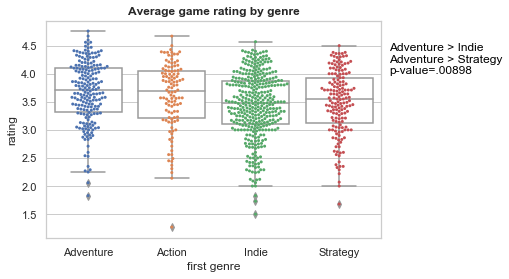

In [35]:
# plotting finding
import seaborn as sns

sns.set(style="whitegrid")
sns.despine()
fig1=sns.swarmplot("first genre","rating", data=game_df_shortgenre,size=3)
fig1=sns.boxplot("first genre","rating", data=game_df_shortgenre,color="white")
fig1.set_title("Average game rating by genre",fontweight="bold")
fig1.text(3.6,4,"Adventure > Indie\nAdventure > Strategy\np-value=.00898", horizontalalignment="left", size="medium", color='black')

plt.savefig("figures/gamerating_genre2.png")

The t-tests show that adventure genre tend to be rated higher than indie genre or strategy genre games.
The above analyses were rerun without outliers (below) and demonstrate a similar results, suggesting that significant difference in rating between genre is likely sound.

F_onewayResult(statistic=9.12279986157175, pvalue=6.045684464251656e-06)

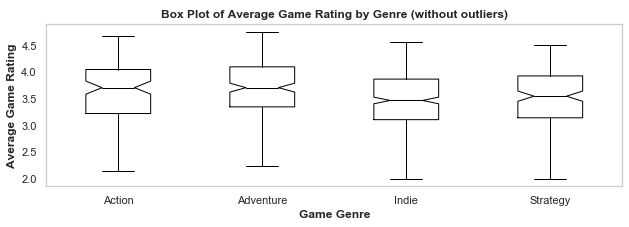

In [36]:
# testing whether results will be similar without outliers
game_df_shortgenre_nooutlier=g=game_df_shortgenre.copy()

for i in game_df_shortgenre["first genre"].unique():
    Q1=game_df_shortgenre["rating"][game_df_shortgenre["first genre"]==i].quantile(.25)
    Q3=game_df_shortgenre["rating"][game_df_shortgenre["first genre"]==i].quantile(.75)
    IQR=Q3-Q1
    lower_bound=Q1-(1.5*IQR)
    for j in game_df_shortgenre_nooutlier.index:
        if (game_df_shortgenre_nooutlier.loc[j,"first genre"]==i) & (game_df_shortgenre_nooutlier.loc[j,"rating"]<lower_bound):
            game_df_shortgenre_nooutlier.loc[j,"outlier"]=True

game_df_shortgenre_nooutlier=game_df_shortgenre_nooutlier[game_df_shortgenre_nooutlier["outlier"]!=True]

game_df_shortgenre_nooutlier.boxplot("rating",by="first genre",figsize=(10,3),grid=False,\
                       notch=True,color="black",\
                       flierprops=dict(marker='x',markersize=7, markeredgecolor="red"))
plt.title("Box Plot of Average Game Rating by Genre (without outliers)",fontweight="bold")
plt.xlabel("Game Genre", fontweight="bold")
plt.ylabel("Average Game Rating", fontweight="bold")
plt.suptitle(" ")

rating_nooutlier=[]
curr_rating=[]
genre_nooutlier=[]

for i in game_df_shortgenre_nooutlier["first genre"].unique():
    curr_rating=game_df_shortgenre_nooutlier["rating"][game_df_shortgenre_nooutlier["first genre"]==i]
    rating_nooutlier.append(curr_rating)
    genre_nooutlier.append(i)

st.f_oneway(rating_nooutlier[0],rating_nooutlier[1],rating_nooutlier[2],rating_nooutlier[3])

Adventure - y=0.0002x-133.0933
Indie - y=0.0003x-211.0312
Strategy - y=0.0004x-298.0452


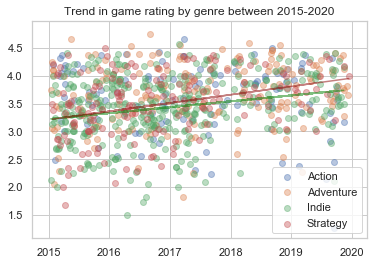

In [37]:
# to further explore how rating across genre differ over time, the following visualisations and linear regressions were run in the top 4 genres

fig, ax = plt.subplots()
for genre, group in game_df_shortgenre.groupby("first genre"):
    plt.scatter(group["release date"], group["rating"],alpha=0.4,label=genre)
ax.legend()
ax.set_title("Trend in game rating by genre between 2015-2020")

game_df["ordtime"]=game_df["release date"].map(dt.datetime.toordinal)

for i in game_df_shortgenre["first genre"].unique():
    (slope,intercept,rval,pval,stderror)=st.linregress(game_df["ordtime"][game_df["first genre"]==i],game_df["rating"][game_df["first genre"]==i])
    if pval<0.05/4:
        print(f'{i} - y={round(slope,4)}x{round(intercept,4)}')
        game_df[i]=slope*game_df["ordtime"][game_df["first genre"]==i]+intercept
        
plt.plot(game_df["release date"],game_df["Indie"],marker="",color="green",alpha=0.5)
plt.plot(game_df["release date"],game_df["Strategy"],marker="",color="darkred",alpha=0.5)

plt.savefig("figures/gamerating_genre_trend.png")